In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2 as cv
import torch
import os
from tqdm import tqdm
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 43.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Training on {device}')

model = YOLO('yolov8n.pt').to(device)

Training on cuda


100%|██████████| 6.25M/6.25M [00:00<00:00, 268MB/s]


In [ ]:
model.info(True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False          432        [16, 3, 3, 3]   -0.00279      0.152 torch.float32
    1                        model.0.bn.weight     False           16                 [16]       2.97       1.86 torch.float32
    2                          model.0.bn.bias     False           16                 [16]      0.249       4.17 torch.float32
    3                      model.1.conv.weight     False         4608       [32, 16, 3, 3]   -0.00012      0.063 torch.float32
    4                        model.1.bn.weight     False           32                 [32]       5.02       1.12 torch.float32
    5                          model.1.bn.bias     False           32                 [32]      0.942        1.5 torch.float32
    6                  model.2.cv1.conv.weight     False         1024       [32, 32, 1, 1]     -0.011     0.0906 torch.float3

(225, 3157200, 0, 8.8575488)

In [ ]:
for name, param in model.named_parameters():
        if 'model.22' not in name:  # Assuming the detect module is model.22
            param.requires_grad = False
        else:
            print(f"Training: {name}")

Training: model.model.22.cv2.0.0.conv.weight
Training: model.model.22.cv2.0.0.bn.weight
Training: model.model.22.cv2.0.0.bn.bias
Training: model.model.22.cv2.0.1.conv.weight
Training: model.model.22.cv2.0.1.bn.weight
Training: model.model.22.cv2.0.1.bn.bias
Training: model.model.22.cv2.0.2.weight
Training: model.model.22.cv2.0.2.bias
Training: model.model.22.cv2.1.0.conv.weight
Training: model.model.22.cv2.1.0.bn.weight
Training: model.model.22.cv2.1.0.bn.bias
Training: model.model.22.cv2.1.1.conv.weight
Training: model.model.22.cv2.1.1.bn.weight
Training: model.model.22.cv2.1.1.bn.bias
Training: model.model.22.cv2.1.2.weight
Training: model.model.22.cv2.1.2.bias
Training: model.model.22.cv2.2.0.conv.weight
Training: model.model.22.cv2.2.0.bn.weight
Training: model.model.22.cv2.2.0.bn.bias
Training: model.model.22.cv2.2.1.conv.weight
Training: model.model.22.cv2.2.1.bn.weight
Training: model.model.22.cv2.2.1.bn.bias
Training: model.model.22.cv2.2.2.weight
Training: model.model.22.cv2.2

In [ ]:
model.info(True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False          432        [16, 3, 3, 3]   -0.00279      0.152 torch.float32
    1                        model.0.bn.weight     False           16                 [16]       2.97       1.86 torch.float32
    2                          model.0.bn.bias     False           16                 [16]      0.249       4.17 torch.float32
    3                      model.1.conv.weight     False         4608       [32, 16, 3, 3]   -0.00012      0.063 torch.float32
    4                        model.1.bn.weight     False           32                 [32]       5.02       1.12 torch.float32
    5                          model.1.bn.bias     False           32                 [32]      0.942        1.5 torch.float32
    6                  model.2.cv1.conv.weight     False         1024       [32, 32, 1, 1]     -0.011     0.0906 torch.float3

(225, 3157200, 0, 8.8575488)

In [43]:
results = model.train(data='/content/drive/MyDrive/YOLO_detection/weapon_data/data.yaml',
        epochs= 120,
        imgsz=960,
        batch=32,
        name='train_detect_module',
        freeze=[f'model.{i}' for i in range(22)],
        augment=True,
        visualize=True,
        single_cls = True)

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/YOLO_detection/weapon_data/data.yaml, epochs=120, time=None, patience=100, batch=32, imgsz=960, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train_detect_module9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=['model.0', 'model.1', 'model.2', 'model.3', 'model.4', 'model.5', 'model.6', 'model.7', 'model.8', 'model.9', 'model.10', 'model.11', 'model.12', 'model.13', 'model.14', 'model.15', 'model.16', 'model.17', 'model.18', 'model.19', 'model.20', 'model.21'], multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=Fa

train: Scanning /content/drive/MyDrive/YOLO_detection/weapon_data/labels/train.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/YOLO_detection/weapon_data/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to runs/detect/train_detect_module9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 960 train, 960 val
Using 2 dataloader workers
Logging results to runs/detect/train_detect_module9
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      9.77G      1.059      0.953      1.023         25        960: 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all         10         10      0.591        0.6      0.533       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      9.73G      1.065     0.8779      1.036         32        960: 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         10         10      0.596        0.6       0.53      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      9.66G     0.9545      0.807      1.036         25        960: 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]


                   all         10         10      0.575        0.6      0.532       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      9.66G     0.7782     0.5936     0.9035         29        960: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         10         10      0.607        0.5      0.477      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      9.72G     0.7055     0.5385     0.9359         24        960: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         10         10       0.83      0.489      0.536      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      9.66G     0.6873     0.5404     0.9285         30        960: 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         10         10          1      0.598      0.678        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      9.66G     0.6995     0.5293      0.958         38        960: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         10         10      0.963        0.6      0.702      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      9.66G     0.6528     0.4811     0.9002         28        960: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         10         10      0.894        0.7      0.802      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      9.66G     0.6908     0.5356     0.9322         25        960: 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         10         10      0.988        0.8      0.817      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      9.72G     0.6625     0.4688     0.9041         34        960: 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         10         10      0.844        0.8      0.797      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      9.66G     0.6215     0.4774     0.8921         31        960: 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         10         10      0.705        0.8       0.72      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      9.66G     0.6736     0.5273     0.8973         24        960: 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         10         10       0.76        0.7      0.708      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      9.72G     0.6106     0.4559     0.8916         34        960: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         10         10       0.84        0.7      0.745      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      9.66G     0.6252     0.4637     0.8808         34        960: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all         10         10      0.846        0.6      0.722      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      9.66G     0.6039     0.4756     0.8649         29        960: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         10         10      0.571        0.7      0.653       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      9.66G     0.6775     0.4966     0.8935         28        960: 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         10         10      0.722      0.781      0.791      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      9.66G     0.6756     0.4929     0.8905         28        960: 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         10         10      0.698        0.7      0.734      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      9.66G     0.6616     0.4895     0.9073         26        960: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         10         10      0.862        0.7      0.752      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      9.66G     0.5914     0.4547     0.8765         27        960: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         10         10       0.67        0.8      0.707      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      9.73G     0.6635     0.4759     0.8794         34        960: 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10         10      0.758        0.7       0.71      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      9.66G     0.6303     0.4901     0.9048         26        960: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         10         10      0.841        0.8      0.799      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      9.66G     0.6614     0.4845      0.883         27        960: 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         10         10      0.871        0.8      0.802      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      9.66G     0.6672     0.4817     0.9035         30        960: 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         10         10      0.851        0.8      0.793      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      9.72G     0.6861     0.5079      0.941         26        960: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         10         10      0.887      0.788      0.833      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      9.66G     0.6157     0.4667     0.8838         30        960: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         10         10      0.854        0.7      0.818      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      9.66G     0.6789     0.5038     0.9218         33        960: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


                   all         10         10      0.874      0.695      0.828      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      9.73G     0.6365     0.4773     0.8656         26        960: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         10         10      0.789        0.8      0.814      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      9.72G     0.6682      0.477     0.8763         22        960: 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         10         10      0.648        0.6      0.657      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      9.66G     0.7115     0.4934     0.9116         24        960: 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         10         10      0.645        0.6      0.636      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      9.66G     0.6784     0.4839     0.9036         28        960: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         10         10      0.694        0.5      0.599      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      9.66G     0.6924     0.5022     0.9003         27        960: 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         10         10      0.702        0.5        0.6      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      9.66G     0.7041     0.5157     0.9317         38        960: 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         10         10      0.873        0.6      0.703      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      9.66G     0.6817     0.4757     0.9018         30        960: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         10         10      0.945        0.6      0.721      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      9.66G     0.6777     0.4681     0.8915         34        960: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         10         10      0.948        0.6      0.717      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      9.66G     0.6858     0.5037     0.9258         30        960: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         10         10      0.796        0.7      0.798       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      9.72G     0.6682     0.4843     0.8885         28        960: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         10         10      0.723        0.6      0.718      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      9.72G     0.6528     0.4737     0.8802         38        960: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         10         10       0.56        0.7      0.644      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      9.72G     0.6382     0.4905     0.8841         31        960: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         10         10      0.958        0.7       0.75      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      9.73G     0.7086     0.4984     0.9261         31        960: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         10         10       0.94        0.7      0.754      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      9.66G     0.6498     0.4964     0.8968         34        960: 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         10         10      0.963        0.8      0.855      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      9.66G     0.5951     0.4475     0.8862         33        960: 100%|██████████| 3/3 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]

                   all         10         10          1      0.698      0.841      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      9.66G     0.6644      0.513      0.923         28        960: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         10         10      0.871      0.676       0.81      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      9.66G     0.6741     0.4884     0.9108         32        960: 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         10         10       0.92        0.7       0.84      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      9.66G     0.6774     0.5011     0.9081         34        960: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         10         10      0.872      0.685      0.797      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      9.66G     0.6267     0.4868     0.8889         33        960: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         10         10      0.874        0.8      0.843      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      9.66G     0.6544     0.4697     0.8956         38        960: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         10         10          1      0.656      0.841       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      9.66G      0.689     0.5116     0.8947         30        960: 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         10         10      0.873        0.7      0.777      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      9.72G     0.6448     0.4613     0.8744         34        960: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all         10         10          1      0.585      0.734       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      9.66G      0.645     0.4992     0.9074         32        960: 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]

                   all         10         10      0.966        0.5      0.679      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      9.66G     0.6906     0.5198     0.9557         34        960: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         10         10      0.987        0.6      0.756      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      9.66G     0.7098     0.4867     0.9243         31        960: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         10         10      0.964        0.6       0.75      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      9.72G     0.6942     0.5014     0.9257         30        960: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         10         10       0.83        0.7      0.805      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      9.66G     0.7081     0.5087     0.9188         37        960: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         10         10      0.754        0.7      0.767      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      9.66G     0.6361     0.4672     0.9119         32        960: 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         10         10      0.717        0.8      0.768      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      9.72G     0.6396     0.4803     0.8949         36        960: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]

                   all         10         10      0.968        0.6      0.706      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      9.66G     0.6597     0.5113     0.9116         36        960: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         10         10       0.99        0.6      0.701      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      9.66G     0.5727      0.431     0.8596         25        960: 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         10         10      0.842        0.7      0.707      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      9.66G     0.5705     0.4456     0.8854         25        960: 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         10         10      0.696      0.687       0.71      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      9.66G     0.5964     0.4555     0.8736         26        960: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         10         10          1      0.585      0.719      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      9.66G      0.691     0.5114     0.9094         24        960: 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         10         10      0.824        0.7      0.783      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      9.66G     0.6468     0.4608     0.8766         22        960: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         10         10      0.845        0.7      0.788      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      9.66G     0.6187      0.449     0.8812         35        960: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         10         10      0.979        0.7      0.793      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      9.66G     0.5948     0.4671     0.8896         23        960: 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         10         10      0.979        0.7      0.806      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      9.66G     0.6406     0.4658     0.9004         27        960: 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         10         10      0.971        0.7      0.847       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      9.66G     0.6187     0.4547     0.8971         27        960: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         10         10      0.778        0.8      0.845      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      9.66G     0.6065     0.4607     0.8943         34        960: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all         10         10      0.708        0.8       0.79      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      9.66G     0.5625     0.4267     0.8505         30        960: 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]

                   all         10         10          1       0.78      0.822      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      9.66G     0.6399     0.4711     0.9005         29        960: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         10         10      0.786        0.8        0.8      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      9.66G     0.5525      0.421     0.8745         33        960: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         10         10      0.828        0.6      0.728      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      9.66G     0.5691     0.4238     0.8577         26        960: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         10         10          1       0.59      0.747      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      9.66G     0.5778     0.4349      0.877         27        960: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


                   all         10         10      0.525        0.8      0.658        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      9.66G      0.533     0.4262     0.8551         28        960: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]

                   all         10         10      0.528        0.7      0.643      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      9.66G      0.536     0.4265     0.8701         27        960: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         10         10      0.529        0.7      0.648      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      9.72G     0.5885     0.4341      0.853         29        960: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         10      0.854      0.589      0.728      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      9.66G     0.5127     0.4062     0.8598         24        960: 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         10         10      0.856      0.596      0.727      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      9.72G     0.5721     0.4476     0.8688         28        960: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         10         10      0.856      0.597      0.706      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      9.66G     0.5825      0.444     0.8816         29        960: 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         10         10      0.721      0.776      0.738      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      9.72G     0.5286     0.4038     0.8482         31        960: 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all         10         10      0.703        0.8       0.77      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      9.72G     0.5972     0.4492     0.8753         27        960: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         10         10      0.623        0.7      0.679      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      9.66G     0.5587     0.4296     0.9014         28        960: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         10         10      0.735        0.6      0.686      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      9.66G     0.5755     0.4346     0.8907         24        960: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         10         10      0.771      0.677      0.728      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      9.72G     0.5544     0.4271     0.8753         32        960: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         10         10      0.874        0.8      0.846      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      9.66G     0.5364      0.422      0.872         24        960: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         10         10      0.813        0.9      0.842      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      9.66G     0.5735     0.4231     0.8768         20        960: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         10         10      0.805        0.9      0.852      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      9.66G     0.5813     0.4482     0.8997         29        960: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         10         10      0.716        0.8      0.757      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      9.66G     0.5373     0.4438     0.8783         19        960: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         10         10          1      0.678      0.802      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      9.66G     0.5454     0.4253     0.8715         33        960: 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         10         10      0.988        0.7      0.802       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      9.72G     0.5041     0.3889     0.8449         31        960: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         10         10      0.836        0.6      0.741      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      9.66G     0.5178     0.4058     0.8872         27        960: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         10         10      0.843        0.6      0.727      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      9.66G     0.5198     0.4059     0.8573         30        960: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]

                   all         10         10      0.795        0.8      0.809      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      9.72G     0.4872     0.3872      0.826         33        960: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         10         10      0.712        0.8      0.785      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      9.72G      0.512     0.3974     0.8664         37        960: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         10         10      0.794        0.8      0.798      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      9.66G     0.5246     0.3978     0.8917         26        960: 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         10         10      0.745        0.8      0.793       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      9.66G     0.5271     0.4215      0.864         30        960: 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         10         10      0.811        0.6      0.756      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      9.72G     0.5761     0.4237     0.8878         25        960: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         10         10          1      0.486      0.676      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      9.66G     0.5488      0.412     0.8847         30        960: 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10         10      0.643        0.8      0.806      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      9.66G     0.4921     0.3782     0.8252         32        960: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         10         10      0.697        0.8      0.803      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      9.66G     0.5569     0.4232     0.8935         29        960: 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         10       0.76      0.636      0.801      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      9.66G     0.5311     0.4163     0.8769         27        960: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         10         10      0.755      0.616      0.798      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      9.66G     0.4762     0.4045     0.8562         34        960: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         10         10      0.756        0.6      0.797      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      9.66G     0.5106       0.42     0.8662         22        960: 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


                   all         10         10      0.817        0.6      0.798      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      9.66G     0.4713     0.3796     0.8697         26        960: 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         10         10      0.869        0.7      0.816      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      9.66G     0.5043     0.4003     0.8543         30        960: 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         10         10      0.888        0.6      0.797       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      9.66G      0.569     0.4426     0.9114         30        960: 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         10         10      0.929        0.6      0.793      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      9.72G     0.5079     0.3927     0.8664         34        960: 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         10         10      0.942        0.6      0.792      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      9.66G     0.4985      0.408      0.873         26        960: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]

                   all         10         10      0.981        0.6      0.799      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      9.66G     0.5496     0.4266     0.8682         24        960: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         10         10      0.994        0.6       0.78       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      9.66G     0.5087      0.393     0.8616         38        960: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         10         10      0.977        0.6      0.803      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      9.66G     0.4747     0.3941     0.8306         33        960: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         10         10      0.974        0.6      0.809      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      9.66G     0.5123     0.3989     0.8693         24        960: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         10         10          1        0.6      0.727      0.294


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      9.66G      0.493     0.3808     0.8427         14        960: 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         10         10          1      0.593      0.713      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      9.66G     0.4533     0.3582     0.8325         14        960: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         10         10          1      0.578      0.708       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      9.66G     0.4471      0.357     0.8399         15        960: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         10         10          1      0.578      0.705      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      9.66G     0.5175     0.3693     0.8351         14        960: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         10         10      0.725        0.6      0.698      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      9.66G     0.4927     0.3646     0.8338         14        960: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10         10          1      0.574      0.713      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      9.66G     0.4504     0.3498     0.8384         16        960: 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]

                   all         10         10      0.873        0.7      0.714      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      9.66G     0.4748     0.3811     0.8278         14        960: 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


                   all         10         10      0.865        0.7      0.728      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      9.66G     0.4716     0.3786       0.85         15        960: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         10         10       0.93        0.8       0.82      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      9.66G     0.4286     0.3367      0.843         16        960: 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         10         10      0.926        0.8      0.819      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      9.66G     0.4469     0.3681     0.8097         16        960: 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         10         10      0.932        0.8      0.819      0.331



120 epochs completed in 0.141 hours.
Optimizer stripped from runs/detect/train_detect_module9/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train_detect_module9/weights/best.pt, 5.6MB

Validating runs/detect/train_detect_module9/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


                   all         10         10      0.783        0.8      0.802      0.418
Speed: 0.8ms preprocess, 34.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train_detect_module9


In [ ]:
print("Precision\t  Recall\tmAP50\t\tmAP95")
results.class_result(0)

Precision	  Recall	mAP50		mAP95


(0.8705891626526546, 0.8, 0.8272983716475096, 0.47084213875205255)

In [44]:
predictions = model.predict(source="/content/drive/MyDrive/YOLO_detection/weapon_data/images/test", conf = 0.58)


image 1/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im16.jpg: 960x960 (no detections), 93.8ms
image 2/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im2.jpg: 960x960 3 Gunss, 36.4ms
image 3/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im31.jpg: 960x960 1 Guns, 37.1ms
image 4/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im33.jpg: 960x960 3 Gunss, 36.2ms
image 5/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im45.jpg: 960x960 1 Guns, 35.9ms
image 6/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im61.jpg: 960x960 1 Guns, 54.0ms
image 7/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im62.jpg: 960x960 1 Guns, 33.2ms
image 8/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im64.jpg: 960x960 2 Gunss, 34.6ms
image 9/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im66.jpg: 960x960 2 Gunss, 27.9ms
image 10/10 /content/drive/MyDriv

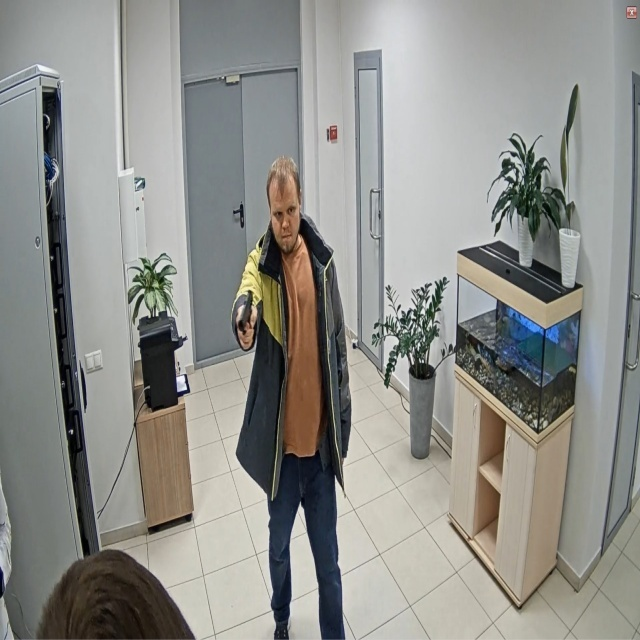

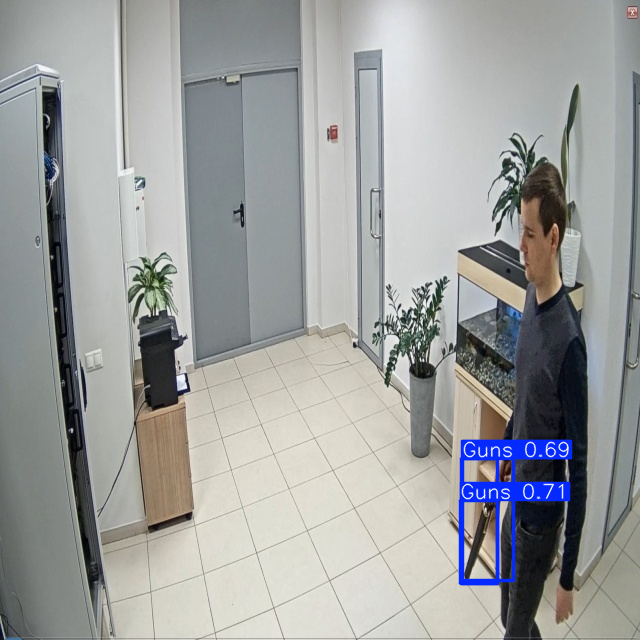

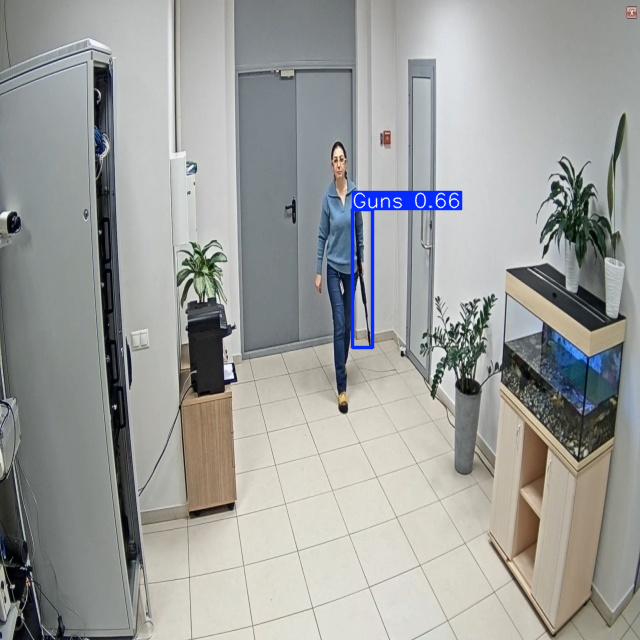

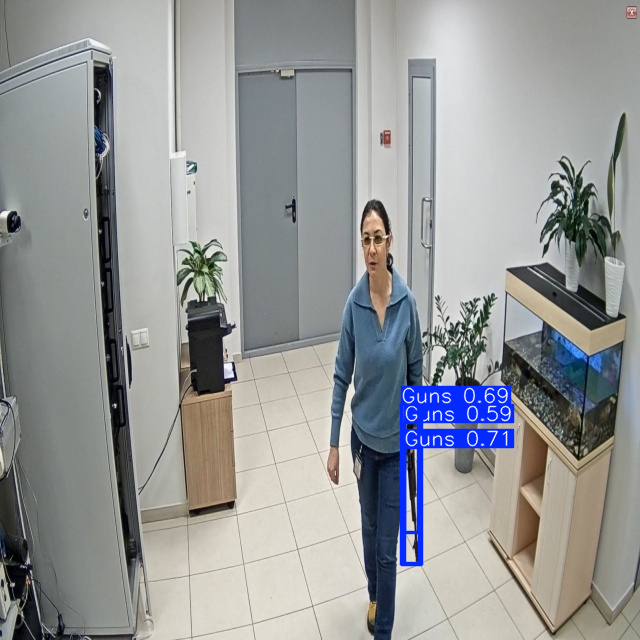

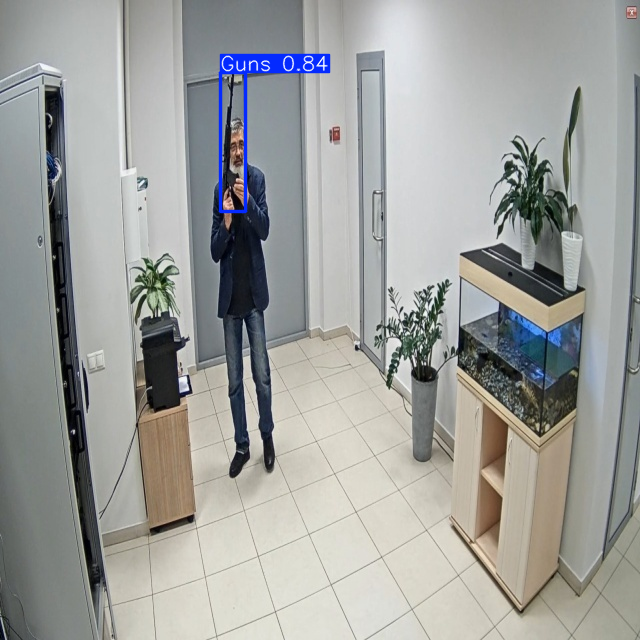

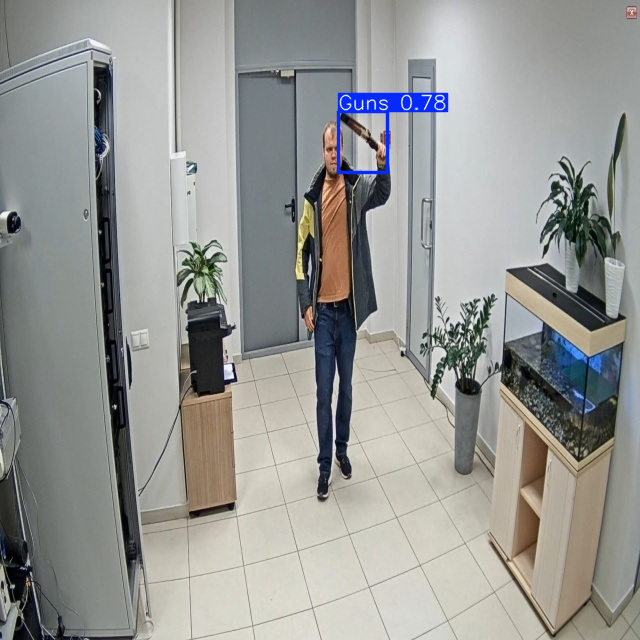

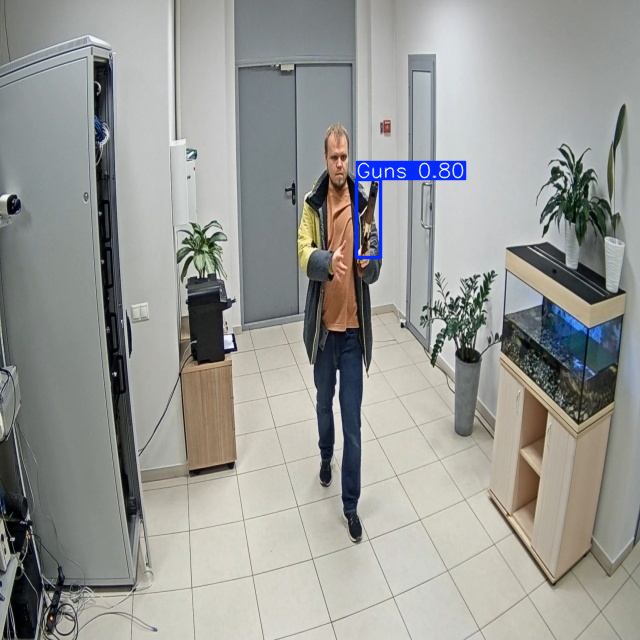

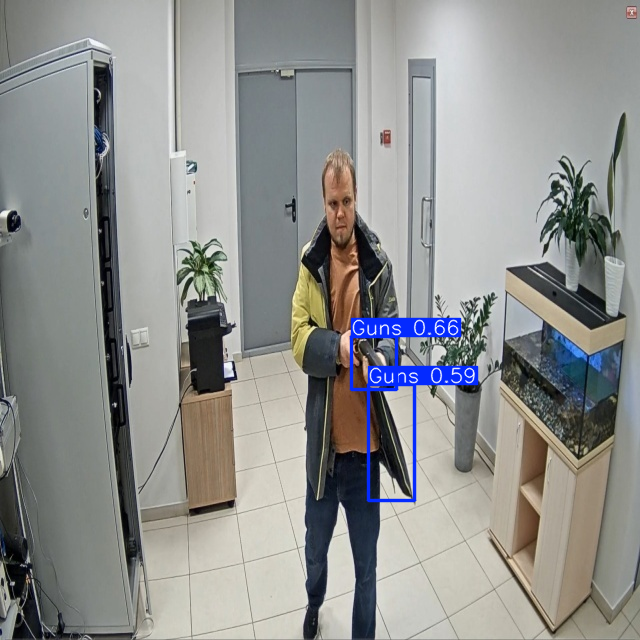

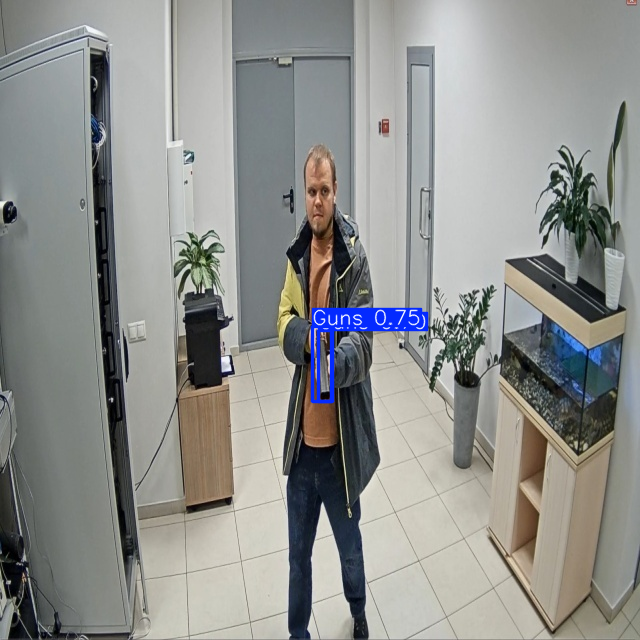

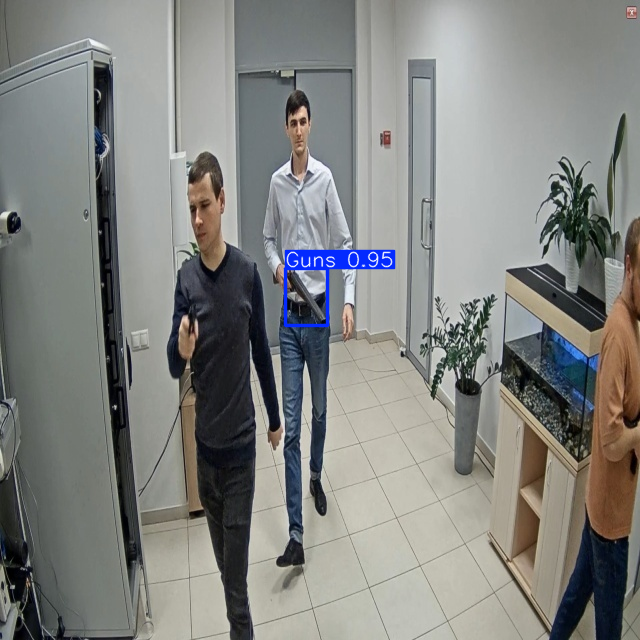

In [45]:
for result in predictions:
    result.show()